In [1]:
# Import modules
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load csv file to dataframe and get a first look at the data
data_raw = pd.read_csv('WHO-COVID-19-global-data.csv',sep=',')
data_raw.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0
5,2020-02-09,AF,Afghanistan,EMRO,NaN,0,NaN,0
6,2020-02-16,AF,Afghanistan,EMRO,NaN,0,NaN,0
7,2020-02-23,AF,Afghanistan,EMRO,NaN,0,NaN,0
8,2020-03-01,AF,Afghanistan,EMRO,1.0,1,NaN,0
9,2020-03-08,AF,Afghanistan,EMRO,NaN,1,NaN,0


In [3]:
"""
We dont necessarly need all the columns. We can get rid of some of them from the current dataframe
or create a new one with the columns we want.
"""
data = data_raw[['Date_reported','Country','WHO_region','Cumulative_deaths']]
data.head(5)

,Date_reported,Country,WHO_region,Cumulative_deaths
0,2020-01-05,Afghanistan,EMRO,0
1,2020-01-12,Afghanistan,EMRO,0
2,2020-01-19,Afghanistan,EMRO,0
3,2020-01-26,Afghanistan,EMRO,0
4,2020-02-02,Afghanistan,EMRO,0


In [4]:
# Show only a specific country ex: Cameroon
cm = data[data['Country'] == "Cameroon"]
cm.tail()

,Date_reported,Country,WHO_region,Cumulative_deaths
8616,2024-05-19,Cameroon,AFRO,1974
8617,2024-05-26,Cameroon,AFRO,1974
8618,2024-06-02,Cameroon,AFRO,1974
8619,2024-06-09,Cameroon,AFRO,1974
8620,2024-06-16,Cameroon,AFRO,1974


In [5]:
"""
By looking at the data, June 16 2024 is the the last date of reporting for all the countries.
So to get the total deaths by country, we need to filter the data by Date_reported == 2024-06-16.
We can also apply the sort_values to sort the cumulative deaths in descending order.
"""
deaths_by_country = data[data['Date_reported'] == "2024-06-16"]
deaths_by_country.sort_values('Cumulative_deaths', ascending=False).head(10)

,Date_reported,Country,WHO_region,Cumulative_deaths
53589,2024-06-16,United States of America,AMRO,1189083
6756,2024-06-16,Brazil,AMRO,702116
22600,2024-06-16,India,SEARO,533619
42172,2024-06-16,Russian Federation,EURO,403031
32852,2024-06-16,Mexico,AMRO,335011
50094,2024-06-16,United Kingdom of Great Britain and Northern I...,EURO,232112
39609,2024-06-16,Peru,AMRO,220831
25629,2024-06-16,Italy,EURO,197081
18406,2024-06-16,Germany,EURO,174979
17008,2024-06-16,France,EURO,168091


In [6]:
#Total deaths in Africa
deaths_in_africa = data[(data['Date_reported'] == "2024-06-16") & (data['WHO_region'] == "AFRO")]
deaths_in_africa.sort_values('Cumulative_deaths', ascending=False).head(10)

,Date_reported,Country,WHO_region,Cumulative_deaths
47531,2024-06-16,South Africa,AFRO,102595
15843,2024-06-16,Ethiopia,AFRO,7574
698,2024-06-16,Algeria,AFRO,6881
55919,2024-06-16,Zimbabwe,AFRO,5740
27027,2024-06-16,Kenya,AFRO,5689
34949,2024-06-16,Namibia,AFRO,4108
55686,2024-06-16,Zambia,AFRO,4069
52657,2024-06-16,Uganda,AFRO,3632
36813,2024-06-16,Nigeria,AFRO,3155
6523,2024-06-16,Botswana,AFRO,2801


In [7]:
#Total deaths in Europe
deaths_in_europe = data[(data['Date_reported'] == "2024-06-16") & (data['WHO_region'] == "EURO")]
deaths_in_europe.sort_values('Cumulative_deaths', ascending=False).head(10)

,Date_reported,Country,WHO_region,Cumulative_deaths
42172,2024-06-16,Russian Federation,EURO,403031
50094,2024-06-16,United Kingdom of Great Britain and Northern I...,EURO,232112
25629,2024-06-16,Italy,EURO,197081
18406,2024-06-16,Germany,EURO,174979
17008,2024-06-16,France,EURO,168091
47997,2024-06-16,Spain,EURO,121852
40308,2024-06-16,Poland,EURO,120713
52890,2024-06-16,Ukraine,EURO,109920
51725,2024-06-16,T�rkiye,EURO,101419
41939,2024-06-16,Romania,EURO,68805


In [8]:
deaths_by_region = deaths_by_country[['WHO_region','Cumulative_deaths']]
deaths_by_region.head(10)

,WHO_region,Cumulative_deaths
232,EMRO,7998
465,EURO,3605
698,AFRO,6881
931,WPRO,34
1164,EURO,159
1397,AFRO,1937
1630,AMRO,12
1863,AMRO,146
2096,AMRO,130867
2329,EURO,8777


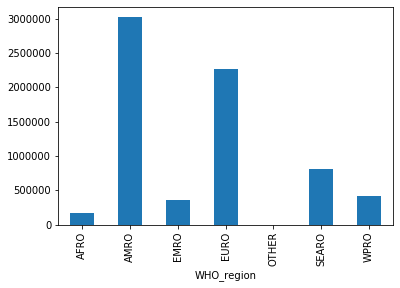

In [9]:
# Visualization of the cumulative deaths by region
df2 = deaths_by_region['Cumulative_deaths'].groupby(deaths_by_region['WHO_region']).sum()
df2.plot(kind='bar')

In [11]:
"""
Top 10 countries with the highest number of deaths.
Besides the name of the us and the UK needs to be shortened!
"""
df3 = deaths_by_country[['Country','Cumulative_deaths']].sort_values('Cumulative_deaths', ascending=False).head(10)
df3.Country.replace(['United Kingdom of Great Britain and Northern Ireland','United States of America'], ['United Kingdom','United States'], inplace=True)
df3 = df3.set_index('Country')
df3

,Cumulative_deaths
Country,
United States,1189083
Brazil,702116
India,533619
Russian Federation,403031
Mexico,335011
United Kingdom,232112
Peru,220831
Italy,197081
Germany,174979


<Figure size 7200x3600 with 0 Axes>

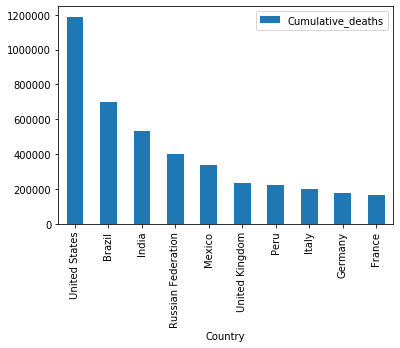

In [13]:
#Visualization of the top 10 countries by cumulative deaths
fig = plt.figure(figsize=(100, 50))
df3.plot(kind='bar')